### Name: Chahak
### Task1: Prediction using Supervised ML

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("student_scores.csv")

In [3]:
df.shape

(25, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


### EDA 

In [7]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

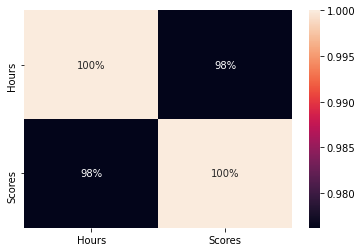

In [8]:
sns.heatmap(df.corr(), annot=True, fmt=".0%")

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

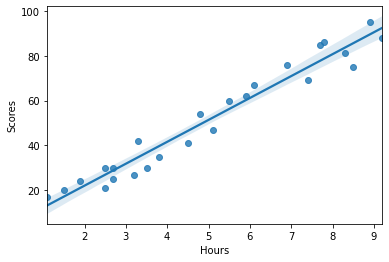

In [9]:
sns.regplot(x="Hours", y="Scores", data=df)
# The correlation between hours and Scores is strong, so there is positive relation

### Preprocessing

In [10]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

### Training the algorithm

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [13]:
regressor.coef_

array([10.46110829])

In [14]:
regressor.intercept_

-1.5369573315500702

In [15]:
line = regressor.coef_*X + regressor.intercept_

In [16]:
line

array([[24.6158134 ],
       [51.81469497],
       [31.93858921],
       [87.38246316],
       [35.0769217 ],
       [14.15470511],
       [94.70523897],
       [55.99913828],
       [85.29024151],
       [26.70803506],
       [79.01357653],
       [60.1835816 ],
       [45.53802999],
       [32.98470004],
       [ 9.97026179],
       [91.56690648],
       [24.6158134 ],
       [18.33914843],
       [62.27580326],
       [75.87524404],
       [26.70803506],
       [48.67636248],
       [38.21525418],
       [70.64468989],
       [80.05968736]])

### Predicting

In [17]:
y_pred = regressor.predict(X_test)

In [18]:
y_pred

array([ 9.97026179, 32.98470004, 18.33914843, 87.38246316, 48.67636248])

In [19]:
comp = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})  
comp 

,Actual,Predicted
0,17,9.970262
1,42,32.984700
2,24,18.339148
3,75,87.382463
4,54,48.676362


In [20]:
hours = 9.25
y_pred2 = round(regressor.predict([[hours]]) [0],2)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(y_pred2))

No of Hours = 9.25
Predicted Score = 95.23


### Evaluation Metrics

In [21]:
from scipy import stats
#Hours vs Scores
pearson_coef, p_value = stats.pearsonr(df["Hours"], df["Scores"])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.9761906560220887  with a P-value of P = 9.132624467459357e-17


In [22]:
print('The r-squared value is: ', regressor.score(X_train,Y_train))

The r-squared value is:  0.9637848283990599


In [23]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, y_pred)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  68.88092074277635


In [24]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, y_pred)) 

Mean Absolute Error: 7.882398086270432


/Users/chahakjadon/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/chahakjadon/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


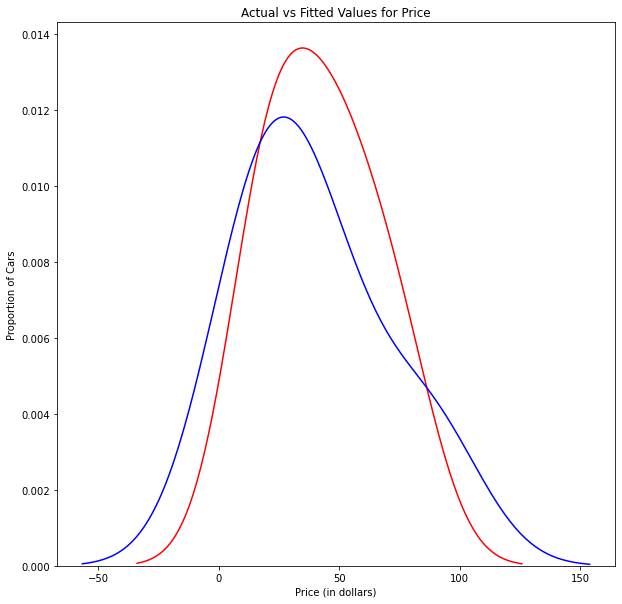

In [25]:
plt.figure(figsize=(10, 10))

ax1 = sns.distplot(Y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()